# Software Defect Detection Notebook

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source
from scipy.stats import kruskal
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

BASELINE_METRICS_DATASET = 'GHPR_dataset-master/baseline.csv'
REPO_INFO_DATASET = 'GHPR_dataset-master/ghprdata/ghprdata.csv'

REPO_INFO_TITLES = [
    'PROJECT_NAME', 'PROJECT_OWNER', 'PROJECT_DESCRIPTION', 'PROJECT_LABEL',
    'PROJECT_LANGUAGE', 'SHA_FIXED', 'SHA_BUG', 'DIFF_CODE',
    'COMMIT_DESCRIPTION', 'COMMIT_TIME', 'OLD_CONTENT', 'NEW_CONTENT',
    'OLD_PATH', 'NEW_PATH', 'PR_TITLE', 'PR_DESCRIPTION'
]

In [6]:
repo_dataframe = pd.read_csv(REPO_INFO_DATASET, names=REPO_INFO_TITLES)

In [7]:
repo_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PROJECT_NAME         3026 non-null   object
 1   PROJECT_OWNER        3026 non-null   object
 2   PROJECT_DESCRIPTION  2947 non-null   object
 3   PROJECT_LABEL        2969 non-null   object
 4   PROJECT_LANGUAGE     3026 non-null   object
 5   SHA_FIXED            3026 non-null   object
 6   SHA_BUG              3026 non-null   object
 7   DIFF_CODE            3026 non-null   object
 8   COMMIT_DESCRIPTION   2298 non-null   object
 9   COMMIT_TIME          3026 non-null   int64 
 10  OLD_CONTENT          3026 non-null   object
 11  NEW_CONTENT          3026 non-null   object
 12  OLD_PATH             3026 non-null   object
 13  NEW_PATH             3026 non-null   object
 14  PR_TITLE             3022 non-null   object
 15  PR_DESCRIPTION       2298 non-null   object
dtypes: int

In [8]:
repo_dataframe.head(10)

,PROJECT_NAME,PROJECT_OWNER,PROJECT_DESCRIPTION,PROJECT_LABEL,PROJECT_LANGUAGE,SHA_FIXED,SHA_BUG,DIFF_CODE,COMMIT_DESCRIPTION,COMMIT_TIME,OLD_CONTENT,NEW_CONTENT,OLD_PATH,NEW_PATH,PR_TITLE,PR_DESCRIPTION
0,Gadgetbridge,Freeyourgadget,Github mirror of Gadgetbridge - A free and clo...,"activity post processing,activity/health,andro...",Java,000f1ab4780fc9460975791c52597f7c04e15be7,ece0f094eb56219ae5188dcd37b90590a9f4029d,diff --git a/app/src/main/java/nodomain/freeyo...,Fix duplicated DeviceType key introduced by th...,20180902,"/* Copyright (C) 2015-2018 Andreas Shimokawa,...","/* Copyright (C) 2015-2018 Andreas Shimokawa,...",app/src/main/java/nodomain/freeyourgadget/gadg...,app/src/main/java/nodomain/freeyourgadget/gadg...,Roidmi: fix duplicated DeviceType key,Fix duplicated DeviceType key introduced by th...
1,MaterialDateTimePicker,wdullaer,Pick a date or time on Android in style,"bug,duplicate,enhancement,help wanted,invalid,...",Java,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c27,288f0a9c4b01ffcedf9fec41dd7c0373ee55f277,diff --git a/library/src/main/java/com/wdullae...,No repro steps known but observed in crash rep...,20190209,/*\n * Copyright (C) 2013 The Android Open Sou...,/*\n * Copyright (C) 2013 The Android Open Sou...,library/src/main/java/com/wdullaer/materialdat...,library/src/main/java/com/wdullaer/materialdat...,NPE fix: DayPickerView accessibilityAnnouncePa...,No repro steps known but observed in crash rep...
2,processing,processing,Source code for the Processing Core and Develo...,"android,arm,arm64,book,cantfix,core,critical,d...",Java,005681edd7b222a51d6bdf64cdcba489cd617d1d,1ebf79592c9bedfca838a6e58463470dc1445b84,diff --git a/core/src/processing/core/PApplet....,A couple of Tools in the Base menu are not ren...,20140403,/* -*- mode: java; c-basic-offset: 2; indent-t...,/* -*- mode: java; c-basic-offset: 2; indent-t...,core/src/processing/core/PApplet.java,core/src/processing/core/PApplet.java,"Fix NPE in PDE, affecting color picker and oth...",A couple of Tools in the Base menu are not ren...
3,pentaho-kettle,pentaho,Pentaho Data Integration ( ETL ) a.k.a Kettle,"bug,duplicate,enhancement,invalid,question,won...",Java,005f52621571d1d0d7140e28a1ad5f629bad3bb9,982fbd18142bf5345d50a58f928b8bc7243dc8be,diff --git a/engine/src/org/pentaho/di/trans/s...,Master PR: https://github.com/pentaho/pentaho-...,20170425,/*********************************************...,/*********************************************...,engine/src/org/pentaho/di/trans/steps/textfile...,engine/src/org/pentaho/di/trans/steps/textfile...,[BACKLOG-16118] Fixed issue with field lengths...,Master PR: https://github.com/pentaho/pentaho-...
4,frontend-maven-plugin,eirslett,"""Maven-node-grunt-gulp-npm-node-plugin to end ...","bug,duplicate,enhancement,invalid,question,won...",Java,0081f8f594e3b67879370d712d35a809dd0250b4,b45e73d6cca812f4874013c4eba00f873ca43d36,diff --git a/frontend-plugin-core/src/main/jav...,because File.rename does not support overwrit...,20190312,package com.github.eirslett.maven.plugins.fron...,package com.github.eirslett.maven.plugins.fron...,frontend-plugin-core/src/main/java/com/github/...,frontend-plugin-core/src/main/java/com/github/...,Fix #670: Use Files.move instead of File.renam...,because File.rename does not support overwrit...
5,cas,apereo,Apereo CAS - Enterprise Single Sign On for all...,"AWS Cloud Directory,AWS DynamoDb,Acceptable Us...",Java,00c16dd03ad44c07088def792e7dd4583187caa3,d0024e28889e597c03a059296f35a4360c5b11e6,diff --git a/support/cas-server-support-geoloc...,NaN,20180727,package org.apereo.cas.support.geo.config;\n\n...,package org.apereo.cas.support.geo.config;\n\n...,support/cas-server-support-geolocation-maxmind...,support/cas-server-support-geolocation-maxmind...,Fix possible NPE in configuration when no db p...,NaN
6,qksms,moezbhatti,The most beautiful SMS messenger for Android,"Bug,Discussion,Easy,Enhancement,Feature,Refact...",Java,00c1e07f0575b518af4ce8e383dff92c6cf04582,fb27d745e638fb2c9e5ec930

## Column Exploration

### Repository Metadata

In [9]:
repo_dataframe['PROJECT_NAME'].value_counts()


PROJECT_NAME
libgdx                 161
BroadleafCommerce      113
Terasology             108
Mycat-Server            76
MinecraftForge          72
                      ... 
SlidingMenu              1
PageIndicatorView        1
Android-PickerView       1
ffmpeg-android-java      1
jianshi                  1
Name: count, Length: 301, dtype: int64

In [10]:
repo_dataframe['PROJECT_OWNER'].value_counts()


PROJECT_OWNER
libgdx               161
apache               132
BroadleafCommerce    113
MovingBlocks         108
MyCATApache           76
                    ... 
grantland              1
qii                    1
hongyangAndroid        1
yangfuhai              1
wingjay                1
Name: count, Length: 259, dtype: int64

In [11]:
repo_dataframe['PROJECT_LANGUAGE'].value_counts()

PROJECT_LANGUAGE
Java      3012
Kotlin      14
Name: count, dtype: int64

In [12]:
split_labels = repo_dataframe['PROJECT_LABEL'].str.lower().str.split(',')

# Step 2: Explode the column into separate rows
exploded_labels = split_labels.explode()

# Step 3: Count occurrences of each unique value
exploded_labels.value_counts()


PROJECT_LABEL
bug             2305
enhancement     2120
duplicate       1929
wontfix         1861
question        1737
                ... 
v/bug              1
v/cancelled        1
v/fixed            1
v/incomplete       1
abi change         1
Name: count, Length: 2753, dtype: int64

In [13]:
has_file_moved = repo_dataframe['OLD_PATH'] != repo_dataframe['NEW_PATH']

has_file_moved.value_counts()

False    3026
Name: count, dtype: int64

### Static Metric Data

In [14]:
metrics_dataframe = pd.read_csv(BASELINE_METRICS_DATASET)

In [15]:
metrics_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SHA                   6052 non-null   object
 1   cbo                   6052 non-null   int64 
 2   wmc                   6052 non-null   int64 
 3   dit                   6052 non-null   int64 
 4   rfc                   6052 non-null   int64 
 5   lcom                  6052 non-null   int64 
 6   totalMethods          6052 non-null   int64 
 7   totalFields           6052 non-null   int64 
 8   nosi                  6052 non-null   int64 
 9   loc                   6052 non-null   int64 
 10  returnQty             6052 non-null   int64 
 11  loopQty               6052 non-null   int64 
 12  comparisonsQty        6052 non-null   int64 
 13  tryCatchQty           6052 non-null   int64 
 14  parenthesizedExpsQty  6052 non-null   int64 
 15  stringLiteralsQty     6052 non-null   

In [16]:
metrics_dataframe.head(10)

,SHA,cbo,wmc,dit,rfc,lcom,totalMethods,totalFields,nosi,loc,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
0,7a955fd6c7de2bd912be544dcfe77f9173a7aa600,5,60,2,55,189,27,5,30,247,...,4,2,47,9,27,5,17,3,191,0
1,000f1ab4780fc9460975791c52597f7c04e15be70,3,10,1,1,9,7,4,1,38,...,0,0,0,22,4,0,4,2,69,0
2,000f1ab4780fc9460975791c52597f7c04e15be71,3,10,1,1,9,7,4,0,38,...,0,0,0,22,4,0,4,2,69,1
3,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c270,20,59,3,63,189,24,9,4,262,...,0,6,6,14,45,8,41,4,222,0
4,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c271,21,58,2,61,189,24,9,0,260,...,0,6,6,14,45,8,41,4,222,1
5,005681edd7b222a51d6bdf64cdcba489cd617d1d0,42,1656,28,796,199352,758,113,378,8719,...,76,218,279,726,943,390,603,22,2985,0
6,005681edd7b222a51d6bdf64cdcba489cd617d1d1,141,1655,16,682,199352,758,113,0,8717,...,76,218,279,726,943,390,603,22,2985,1
7,005f52621571d1d0d7140e28a1ad5f629bad3bb90,24,223,2,153,6,25,5,4,760,...,19,19,55,59,146,37,71,6,219,0
8,005f52621571d1d0d7140e28a1ad5f629bad3bb91,25,222,1,142,6,25,5,0,759,...,19,19,55,58,145,37,71,6,219,1
9,0081f8f594e3b67879370d712d35a809dd0250b40,10,54,1,49,0,18,8,5,251,...,6,0,64,2,48,16,47,5,120,0


In [17]:
COLUMN_RENAME_MAP = {
    'cbo': 'coupingBtObjects',
    'wmc': 'branchInstrPerClass', #Weight Method Class
    'dit': 'maxInheritanceDepth', #Depth Inheritance Tree
    'rfc': 'uniqueMethodInvCount', #Response for a Class
    'lcom': 'decohesionMetric', #Lack of Cohesion of Methods
    'loc': 'linesOfCode',
    'nosi': 'staticInvocationCount'
}

metrics_dataframe = metrics_dataframe.rename(columns=COLUMN_RENAME_MAP)
metrics_dataframe.columns

Index(['SHA', 'coupingBtObjects', 'branchInstrPerClass', 'maxInheritanceDepth',
       'uniqueMethodInvCount', 'cohesionMetric', 'totalMethods', 'totalFields',
       'staticInvocationCount', 'linesOfCode', 'returnQty', 'loopQty',
       'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty',
       'stringLiteralsQty', 'numbersQty', 'assignmentsQty',
       'mathOperationsQty', 'variablesQty', 'maxNestedBlocks',
       'uniqueWordsQty', 'defect'],
      dtype='object')

In [18]:
metrics_dataframe.head(10)

,SHA,coupingBtObjects,branchInstrPerClass,maxInheritanceDepth,uniqueMethodInvCount,cohesionMetric,totalMethods,totalFields,staticInvocationCount,linesOfCode,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
0,7a955fd6c7de2bd912be544dcfe77f9173a7aa600,5,60,2,55,189,27,5,30,247,...,4,2,47,9,27,5,17,3,191,0
1,000f1ab4780fc9460975791c52597f7c04e15be70,3,10,1,1,9,7,4,1,38,...,0,0,0,22,4,0,4,2,69,0
2,000f1ab4780fc9460975791c52597f7c04e15be71,3,10,1,1,9,7,4,0,38,...,0,0,0,22,4,0,4,2,69,1
3,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c270,20,59,3,63,189,24,9,4,262,...,0,6,6,14,45,8,41,4,222,0
4,0024dbdd6ba3cc7797cc0b1ae537dcdc488c4c271,21,58,2,61,189,24,9,0,260,...,0,6,6,14,45,8,41,4,222,1
5,005681edd7b222a51d6bdf64cdcba489cd617d1d0,42,1656,28,796,199352,758,113,378,8719,...,76,218,279,726,943,390,603,22,2985,0
6,005681edd7b222a51d6bdf64cdcba489cd617d1d1,141,1655,16,682,199352,758,113,0,8717,...,76,218,279,726,943,390,603,22,2985,1
7,005f52621571d1d0d7140e28a1ad5f629bad3bb90,24,223,2,153,6,25,5,4,760,...,19,19,55,59,146,37,71,6,219,0
8,005f52621571d1d0d7140e28a1ad5f629bad3bb91,25,222,1,142,6,25,5,0,759,...,19,19,55,58,145,37,71,6,219,1
9,0081f8f594e3b67879370d712d35a809dd0250b40,10,54,1,49,0,18,8,5,251,...,6,0,64,2,48,16,47,5,120,0


In [19]:
metrics_dataframe.describe()

,coupingBtObjects,branchInstrPerClass,maxInheritanceDepth,uniqueMethodInvCount,cohesionMetric,totalMethods,totalFields,staticInvocationCount,linesOfCode,returnQty,...,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,uniqueWordsQty,defect
count,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,...,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000,6052.000000
mean,27.493721,86.177958,4.599141,68.954395,1242.030238,33.497852,14.049405,5.945142,442.074190,25.410112,...,3.218275,5.267845,36.727859,31.120621,65.899042,15.794118,49.700430,5.041143,219.283212,0.500000
std,33.214827,136.077153,9.288447,85.771623,9449.009245,53.556999,26.051029,25.263058,681.566084,47.058370,...,8.569417,13.956639,118.995663,85.715467,101.501174,40.011677,72.531059,5.920991,267.134701,0.500041
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,9.000000,18.000000,1.000000,18.000000,4.000000,8.000000,3.000000,0.000000,93.000000,4.000000,...,0.000000,0.000000,3.000000,2.000000,13.000000,1.000000,10.000000,2.000000,74.000000,0.000000
50%,18.000000,45.000000,2.000000,44.000000,43.000000,17.000000,7.000000,0.000000,230.000000,12.000000,...,1.000000,1.000000,12.000000,9.000000,34.000000,4.000000,27.000000,4.000000,139.000000,0.500000
75%,34.000000,100.000000,4.000000,89.000000,267.000000,39.000000,18.000000,3.000000,521.250000,28.000000,...,3.000000,5.000000,34.000000,29.000000,80.000000,14.000000,62.000000,6.000000,269.000000,1.000000
max,419.000000,1714.000000,285.000000,1203.000000,199855.000000,758.000000,903.000000,475.000000,8832.000000,579.000000,...,125.000000,218.000000,4566.000000,2856.000000,2016.000000,501.000000,1050.000000,77.000000,3345.000000,1.000000


In [20]:
metrics_dataframe['defect'].value_counts()

defect
0    3026
1    3026
Name: count, dtype: int64

In [21]:
metrics_dataframe['maxInheritanceDepth'].value_counts()

maxInheritanceDepth
1      2245
2      1386
3       557
4       371
5       240
       ... 
265       1
88        1
44        1
69        1
51        1
Name: count, Length: 68, dtype: int64

## Plotting Variables

In [22]:
DEFECT_COL = 'defect'

INPUT_COLUMNS = [x for x in metrics_dataframe.columns if x != DEFECT_COL and x != 'SHA']

print(len(INPUT_COLUMNS))
print(INPUT_COLUMNS)

21
['coupingBtObjects', 'branchInstrPerClass', 'maxInheritanceDepth', 'uniqueMethodInvCount', 'cohesionMetric', 'totalMethods', 'totalFields', 'staticInvocationCount', 'linesOfCode', 'returnQty', 'loopQty', 'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty', 'stringLiteralsQty', 'numbersQty', 'assignmentsQty', 'mathOperationsQty', 'variablesQty', 'maxNestedBlocks', 'uniqueWordsQty']


In [23]:
def create_boxplot(df, cat_col, y_col):
    sns.boxplot(data=df, x=cat_col, y=y_col)
    plt.title(f'Boxplot: {cat_col} vs {y_col}')
    plt.show()

In [24]:
def create_violin_plot(df, cat_col, y_col):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=cat_col, y=y_col, data=df)
    plt.title(f'Violin Plot of {y_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(y_col)
    plt.show()

In [25]:
def perform_kruskal_wallis(df, cat_col, y_col):
    groups = [df[y_col][df[cat_col] == category] for category in df[cat_col].unique()]
    h_stat, p_value = kruskal(*groups)
    return h_stat, p_value

In [26]:
low_p_values = []

for index, col in enumerate(INPUT_COLUMNS):
    kruskal_metrics = perform_kruskal_wallis(metrics_dataframe, DEFECT_COL, col)
    print(f'{index}-{col}:\n\tH-Statistic: {kruskal_metrics[0]}\n\tP-Value: {kruskal_metrics[1]}')
    if kruskal_metrics[1] < 0.05:
        low_p_values.append(index)

0-coupingBtObjects:
	H-Statistic: 56.856994652124996
	P-Value: 4.686839843074093e-14
1-branchInstrPerClass:
	H-Statistic: 0.31336580155383403
	P-Value: 0.5756221019649925
2-maxInheritanceDepth:
	H-Statistic: 95.36543024164682
	P-Value: 1.5829388684191107e-22
3-uniqueMethodInvCount:
	H-Statistic: 3.247173837075031
	P-Value: 0.07154672233740332
4-cohesionMetric:
	H-Statistic: 0.0475807466002438
	P-Value: 0.8273277347681901
5-totalMethods:
	H-Statistic: 0.08975386939436736
	P-Value: 0.7644902931652607
6-totalFields:
	H-Statistic: 0.06485312592060419
	P-Value: 0.7989835743249369
7-staticInvocationCount:
	H-Statistic: 1815.3891510456813
	P-Value: 0.0
8-linesOfCode:
	H-Statistic: 0.20509525719122892
	P-Value: 0.650639158039694
9-returnQty:
	H-Statistic: 0.18540492778922116
	P-Value: 0.666768895289228
10-loopQty:
	H-Statistic: 0.06695428968682354
	P-Value: 0.7958240721493421
11-comparisonsQty:
	H-Statistic: 0.594213944994098
	P-Value: 0.44079422303718463
12-tryCatchQty:
	H-Statistic: 0.148278

In [27]:
print('\nHighly Associated Columns:')
for index in low_p_values:
    print(f'\t{INPUT_COLUMNS[index]}')


Highly Associated Columns:
	coupingBtObjects
	maxInheritanceDepth
	staticInvocationCount


### Analyzing Box Plots

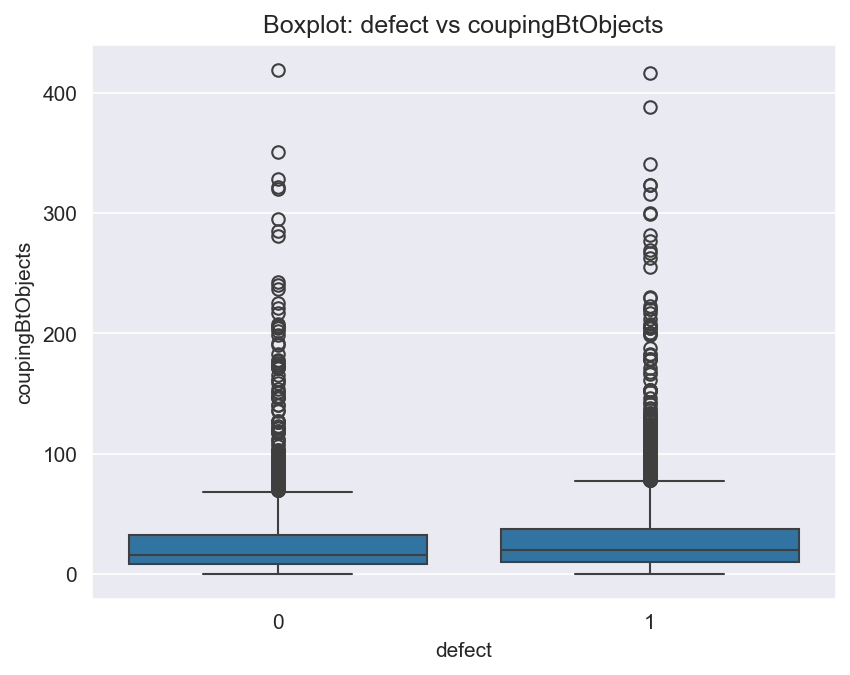

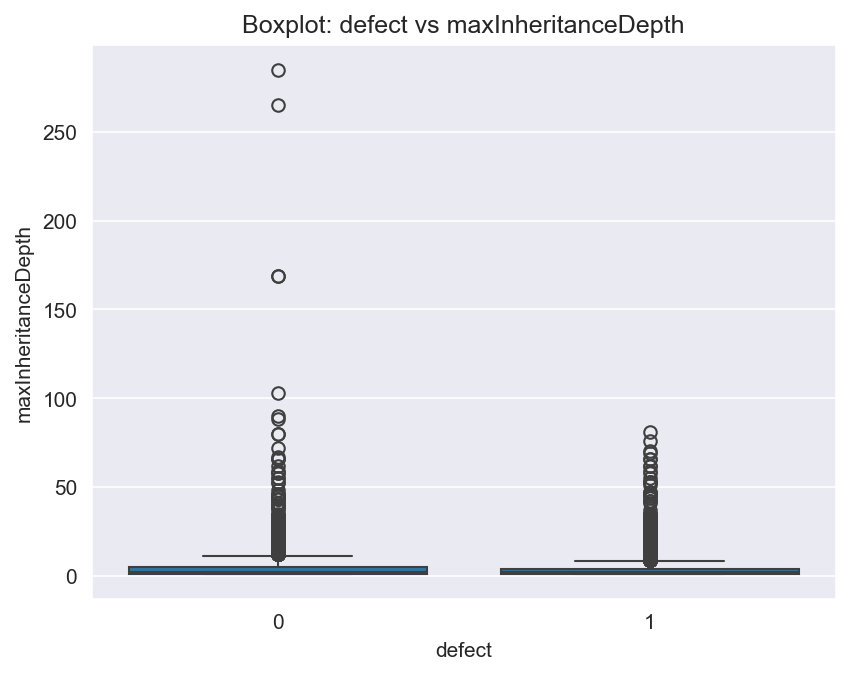

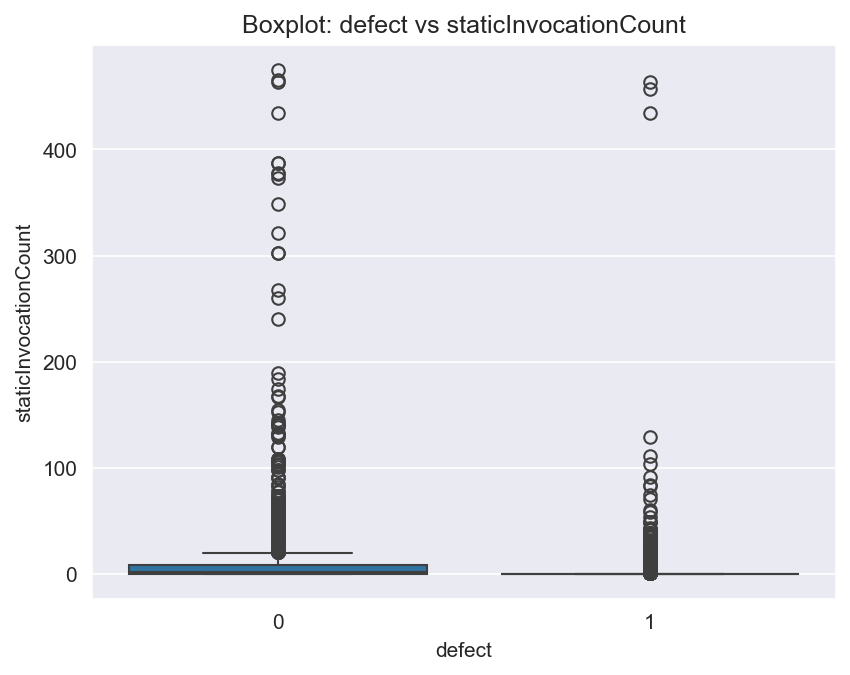

In [28]:
for col_index in low_p_values:
    create_boxplot(metrics_dataframe, DEFECT_COL, INPUT_COLUMNS[col_index])

### Analyzing Violin Plots

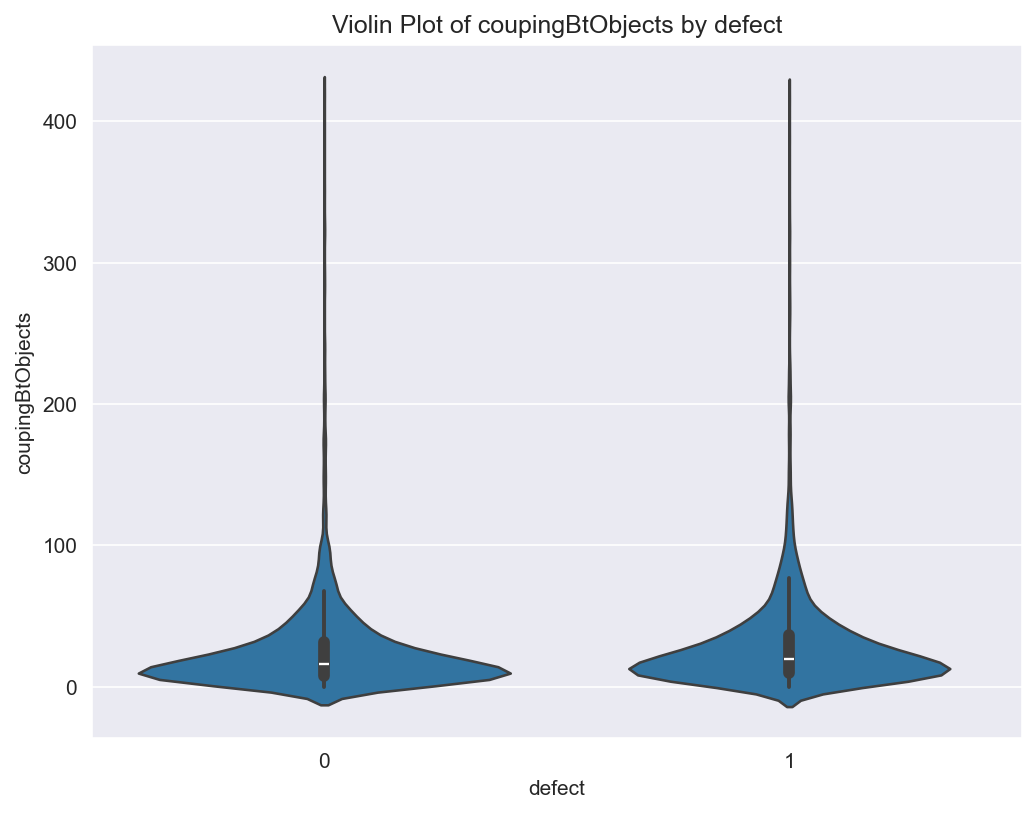

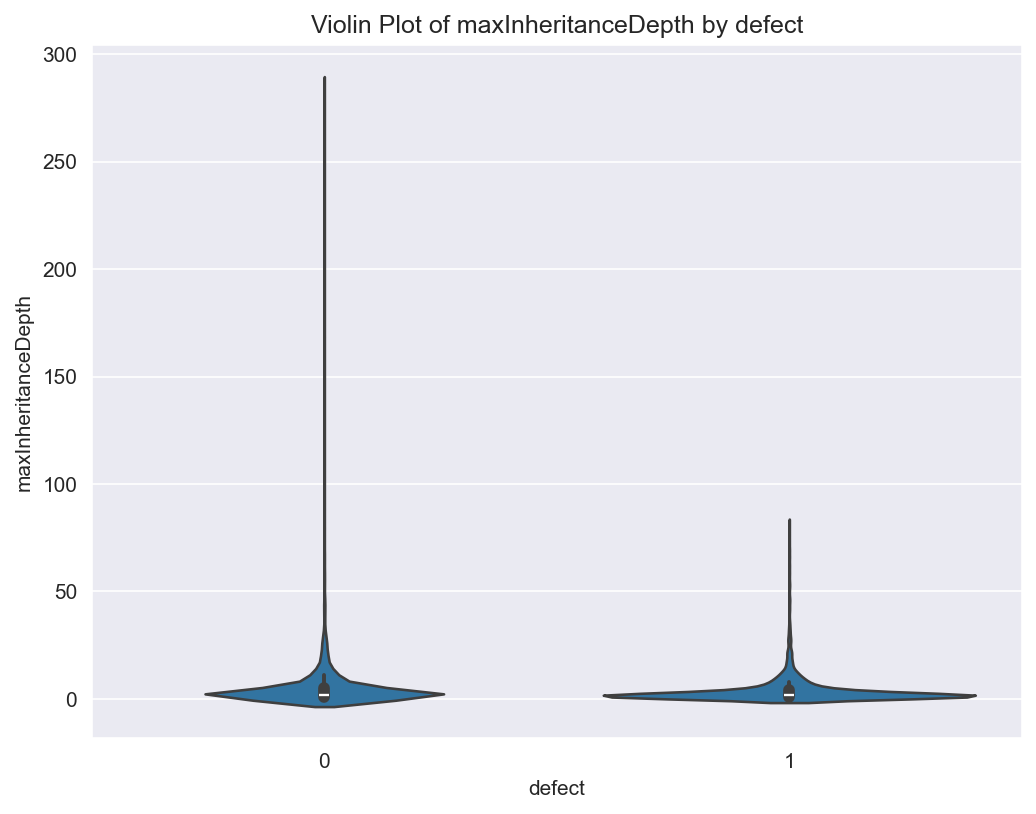

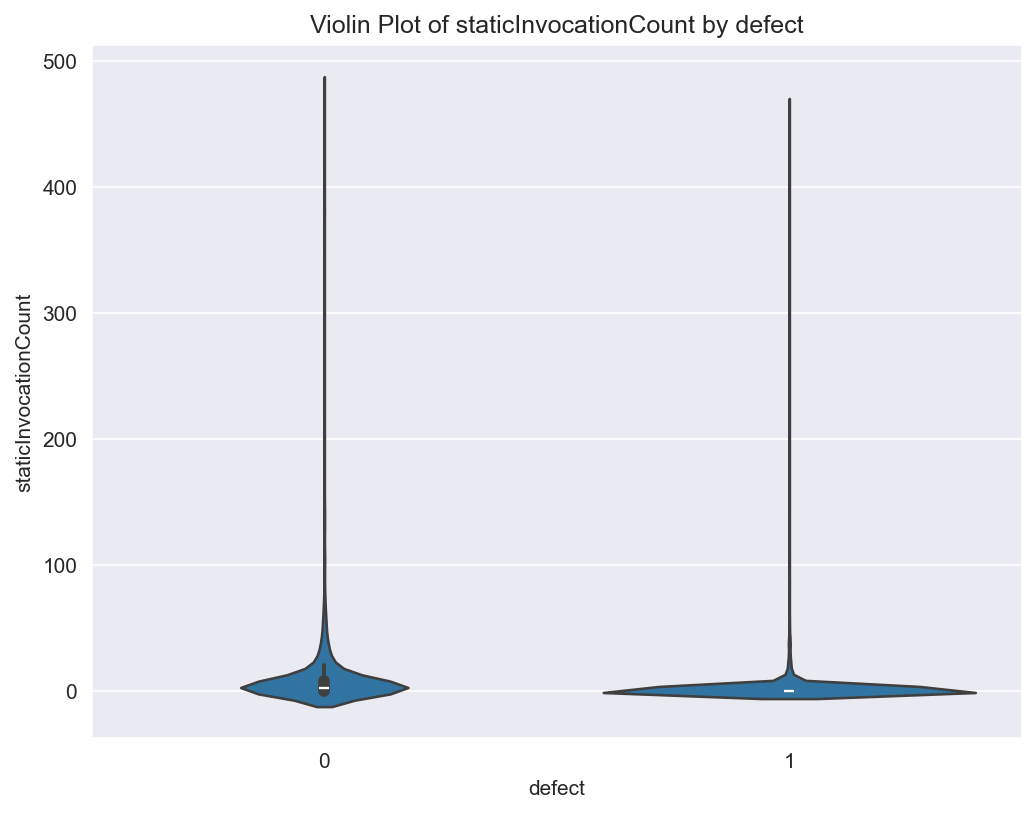

In [29]:
for col_index in low_p_values:
    create_violin_plot(metrics_dataframe, DEFECT_COL, INPUT_COLUMNS[col_index])

## Experimenting with a Decision Tree

In [56]:
import json
import os

TEMP_DATA_FILE = 'data.json'

ccp_value_accuracy_record = {}
if os.path.exists(TEMP_DATA_FILE):
    with open(TEMP_DATA_FILE, 'r') as json_file:
        ccp_value_accuracy_record = json.load(json_file)


In [57]:
defect_label_encoder = LabelEncoder()
defect_label_encoder.fit(metrics_dataframe[DEFECT_COL].values)

print(defect_label_encoder.classes_)

defect_encoded_labels = defect_label_encoder.fit_transform(metrics_dataframe[DEFECT_COL].values)

[0 1]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(metrics_dataframe[INPUT_COLUMNS], defect_encoded_labels, test_size=0.25)

In [59]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy:.2%}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.2%}")

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

if ccp_value_accuracy_record['0'] is None:
    ccp_value_accuracy_record['0'] = test_accuracy
elif ccp_value_accuracy_record['0'] < test_accuracy:
    ccp_value_accuracy_record['0'] = test_accuracy

Testing Accuracy: 63.38%
Balanced Accuracy: 63.39%

Confusion Matrix:
[[488 264]
 [290 471]]


In [42]:
dot_data = export_graphviz(dt_classifier,
                           feature_names=INPUT_COLUMNS,
                           proportion=True,
                           precision=2,
                           rounded=True,
                           class_names=['0', '1'],
                           impurity=False,
                           leaves_parallel=True)
graph = Source(dot_data)
graph

In [43]:
graph.render('output_graph-base.png', format='png', cleanup=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.180543 to fit


'output_graph-base.png.png'

In [66]:
ccp_alpha = 0.0008

dt_classifier = DecisionTreeClassifier(ccp_alpha=ccp_alpha)

dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy:.2%}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.2%}")

print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

if str(ccp_alpha) not in ccp_value_accuracy_record:
    ccp_value_accuracy_record[str(ccp_alpha)] = test_accuracy
elif ccp_value_accuracy_record[str(ccp_alpha)] < test_accuracy:
    ccp_value_accuracy_record[str(ccp_alpha)] = test_accuracy

Testing Accuracy: 78.65%
Balanced Accuracy: 78.63%

Confusion Matrix:
[[558 194]
 [129 632]]


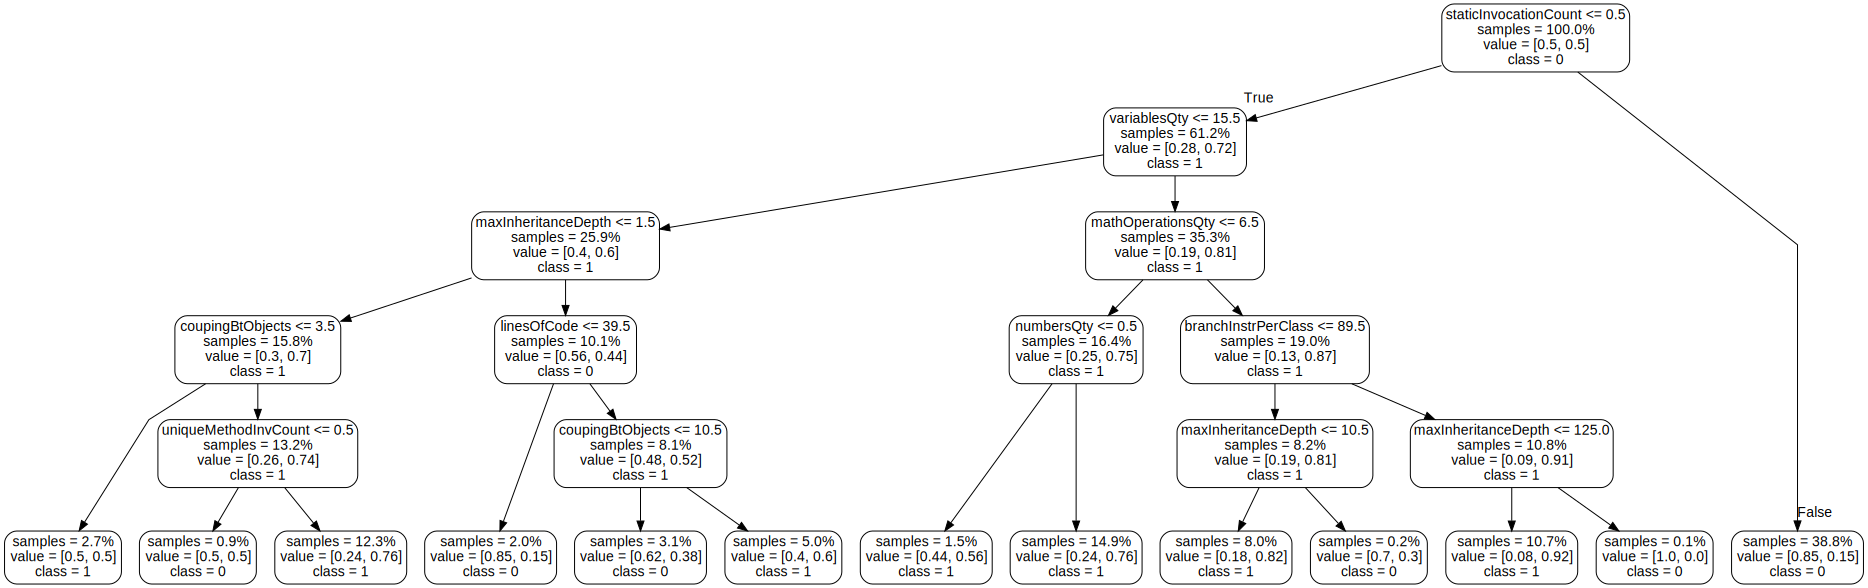

In [64]:
dot_data = export_graphviz(dt_classifier,
                           feature_names=INPUT_COLUMNS,
                           proportion=True,
                           precision=2,
                           rounded=True,
                           class_names=['0', '1'],
                           impurity=False,
                           leaves_parallel=True)
graph = Source(dot_data)
graph

In [37]:
graph.render(f'output_graph-{ccp_alpha}', format='png', cleanup=True)

'output_graph-0.00086.png'

In [65]:
for k, v in ccp_value_accuracy_record.items():
    print(f'{k}: {v:.2%}')

0.1: 78.12%
0.01: 78.12%
0.001: 79.44%
0.0001: 62.52%
0.005: 78.45%
0.002: 79.11%
0.0009: 79.44%
0.0008: 79.25%
0.00086: 78.65%
0: 64.51%
0.00085: 78.65%


In [55]:
with open(TEMP_DATA_FILE, "w") as json_file:
    json.dump(ccp_value_accuracy_record, json_file, indent=2)